LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [2]:
## Se lee el archivo
df = pd.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')

In [30]:
dfcopia= df.copy()


In [31]:
## Computa la suma del porcentaje de la población por región
data = (df.groupby('Region')['Poblacion 0-14','Poblacion 15-64','Poblacion 65+'].sum() / 100).sort_values(by='Region')
data

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Africa,111.362,144.527,9.117
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942


In [32]:
dataT= data.T
dataT

Region,Africa,Asia,Europa,Las Americas,Oceania,Oriente Medio
Poblacion 0-14,111.362,53.186,37.802,53.755,17.848,17.547
Poblacion 15-64,144.527,106.687,138.306,109.018,31.331,32.511
Poblacion 65+,9.117,10.130,28.905,12.231,2.825,1.942


## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


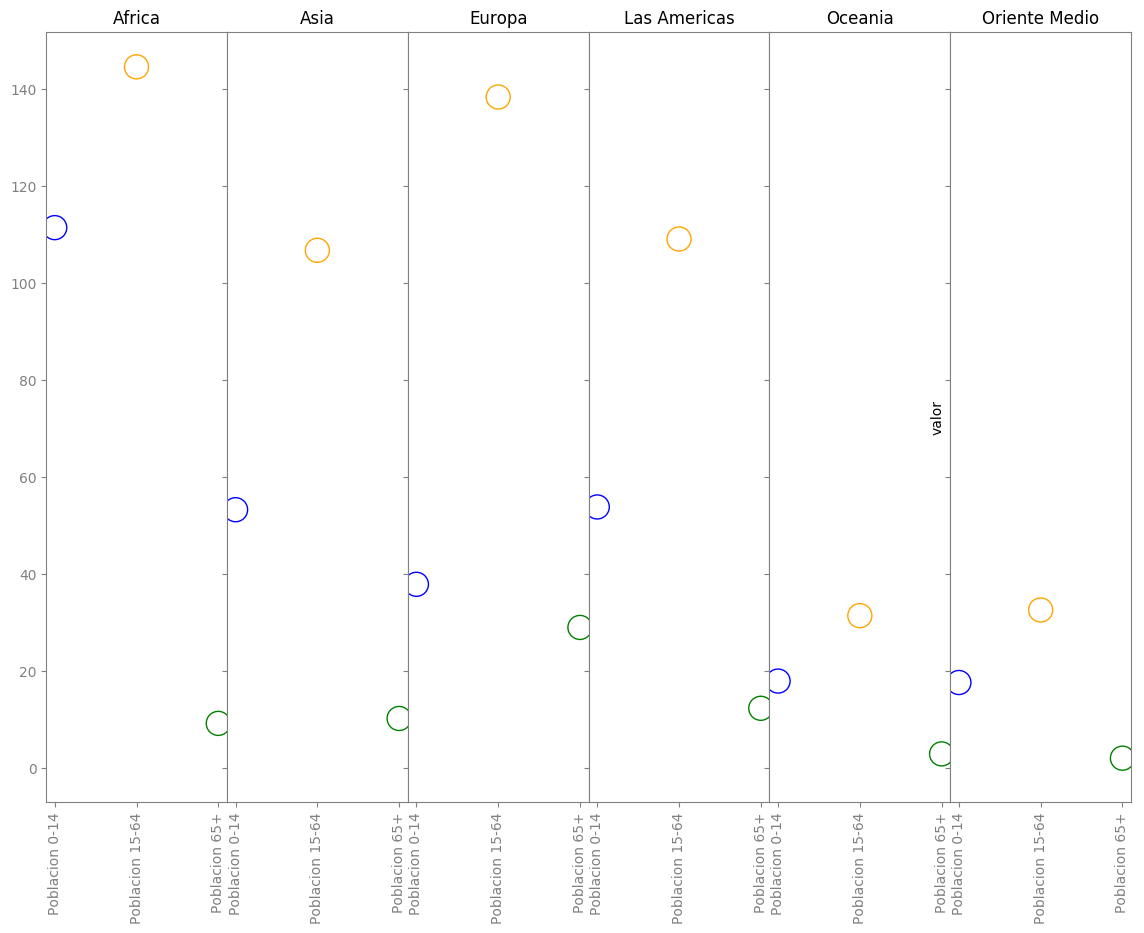

In [37]:
with plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'gray', 'ytick.color':'gray', 'figure.facecolor':'white'}): 
    fig, axs = plt.subplots(1, 6, sharex='col', sharey=True, figsize=(14, 10));
    plt.subplots_adjust(wspace = 0, hspace=0)
    plt.style.use('default')
    colors = ['blue', 'orange', 'green']

for i, colname in enumerate(dataT.columns):
    axs[i].scatter(list(dataT.index), dataT[colname], s=300, edgecolors=colors, linewidths=1, 
                       facecolors='none')
    axs[i].set_title(colname)
    
    plt.style.use('default')
    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)
        
    
        


## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


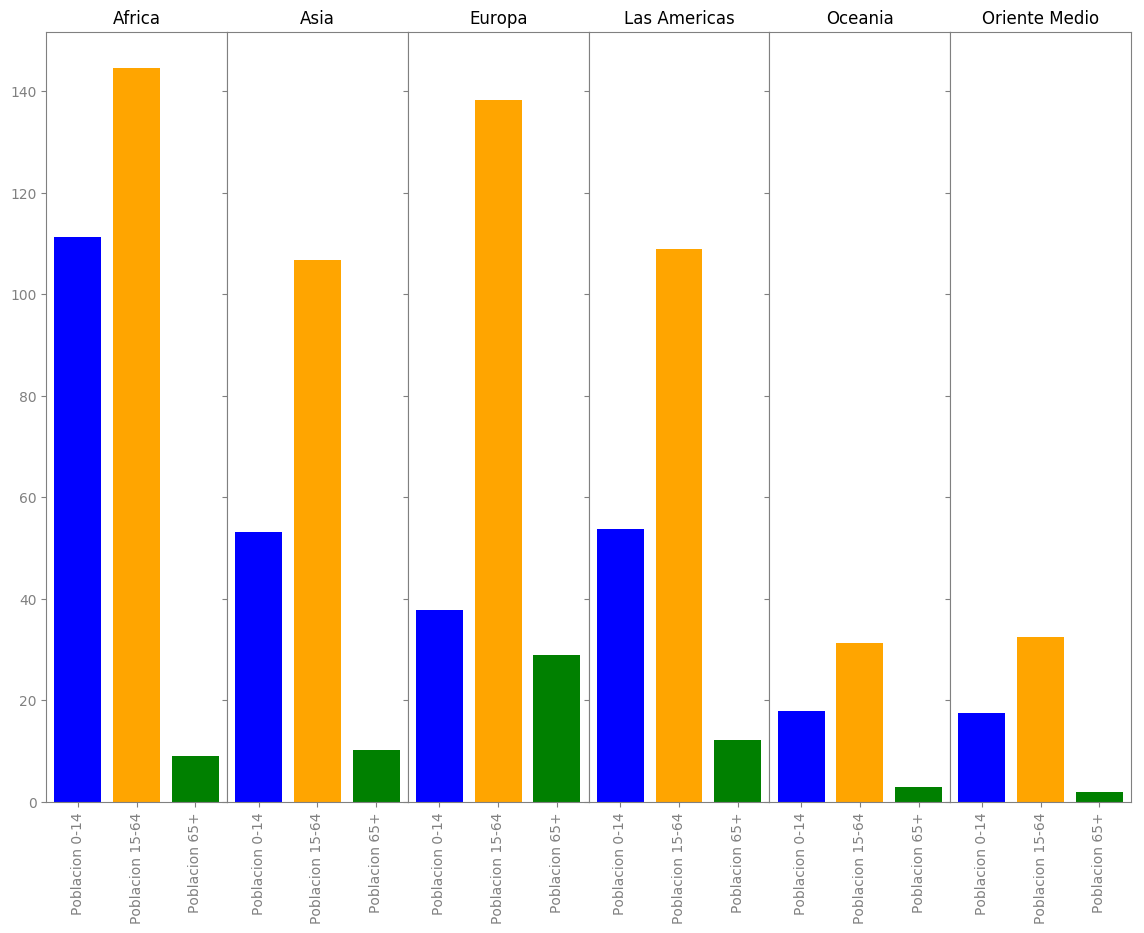

In [41]:
with plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'gray', 'ytick.color':'gray', 'figure.facecolor':'white'}): 
    fig, axs = plt.subplots(1, 6, sharex='col', sharey=True, figsize=(14, 10));
    plt.subplots_adjust(wspace = 0, hspace=0)
    plt.style.use('default')
    colors = ['blue', 'orange', 'green']

for i, colname in enumerate(dataT.columns):
    axs[i].bar(list(dataT.index), dataT[colname], color=colors)
    axs[i].set_title(colname)
    
    plt.style.use('default')
    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)
        
    

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

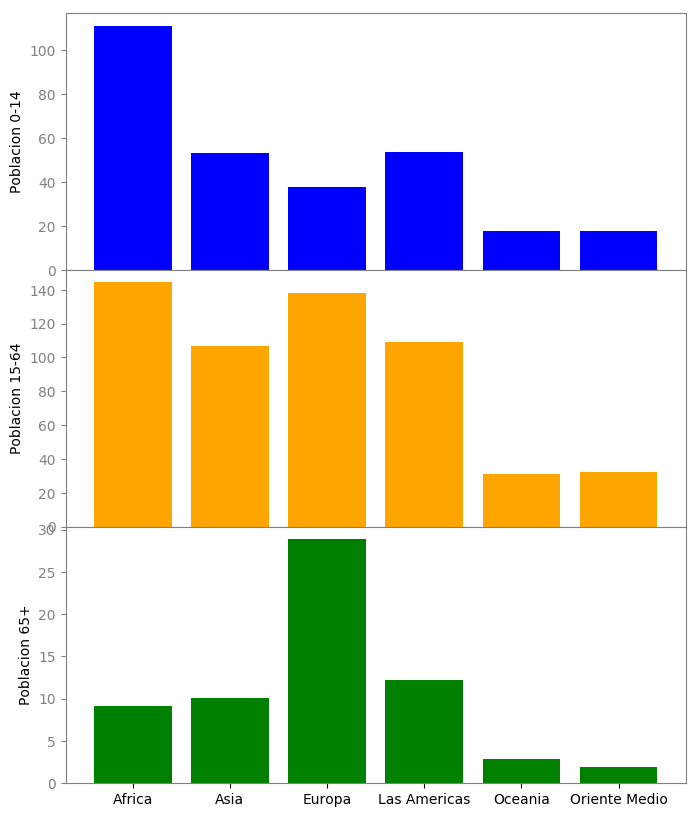

In [63]:
with plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'black', 'ytick.color':'gray', 'figure.facecolor':'white'}): 
    fig, axs = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(8, 10));
    plt.xticks(rotation='vertical')

plt.subplots_adjust(wspace = 0, hspace=0)
colors = ['blue', 'orange', 'green']
for i, colname in enumerate(data.columns):
    axs[i].bar(list(data.index), data[colname], color=colors[i])
    axs[i].set_ylabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)
    

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

In [65]:
df = pd.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')
copia = df.copy()
year=[]
year = [ z.split('-')[0] for z in df.Ano]
df['year']=year
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares', 'year'],
      dtype='object')

In [75]:
aux = df.copy()

aux2 = aux.groupby(['year', 'Region'])['Gasto en salud (per capita)'].mean()
aux3 = aux2.to_frame()
aux3.reset_index(inplace=True)
aux4 = aux3.drop(['Region'], axis=1)
aux4 = aux3[['year', 'Gasto en salud (per capita)']]





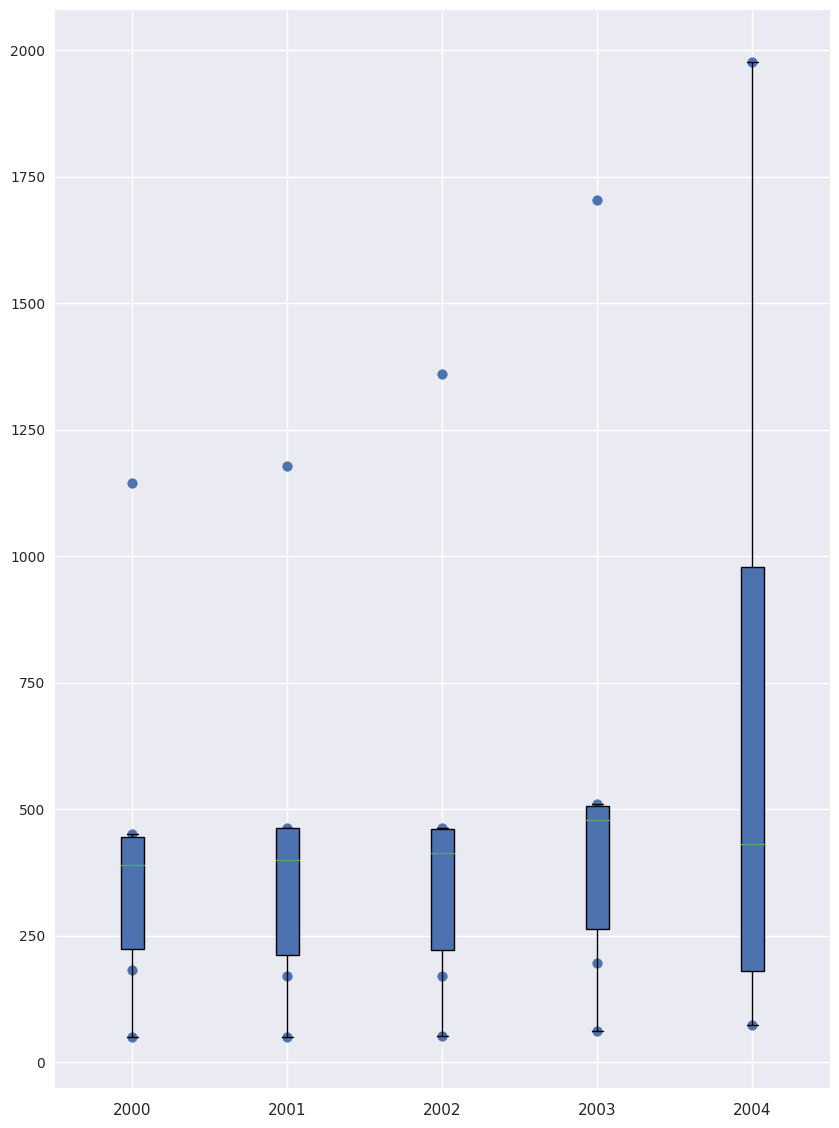

In [121]:
fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(10, 14));
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
#plt.style.use('seaborn')
for i, colname in enumerate(aux4['year'].unique()):
    axs[i].boxplot(list(aux4[aux4['year'] == colname].T.values[1]),patch_artist=True)
    axs[i].scatter(np.ones(aux4[aux4['year'] == colname]['Gasto en salud (per capita)'].shape[0]), aux4[aux4['year'] == colname]['Gasto en salud (per capita)'])
    axs[i].set_xticklabels([""])
    axs[i].set_xlabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)
        

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

Text(0.5, 0.98, 'Region/Anio')

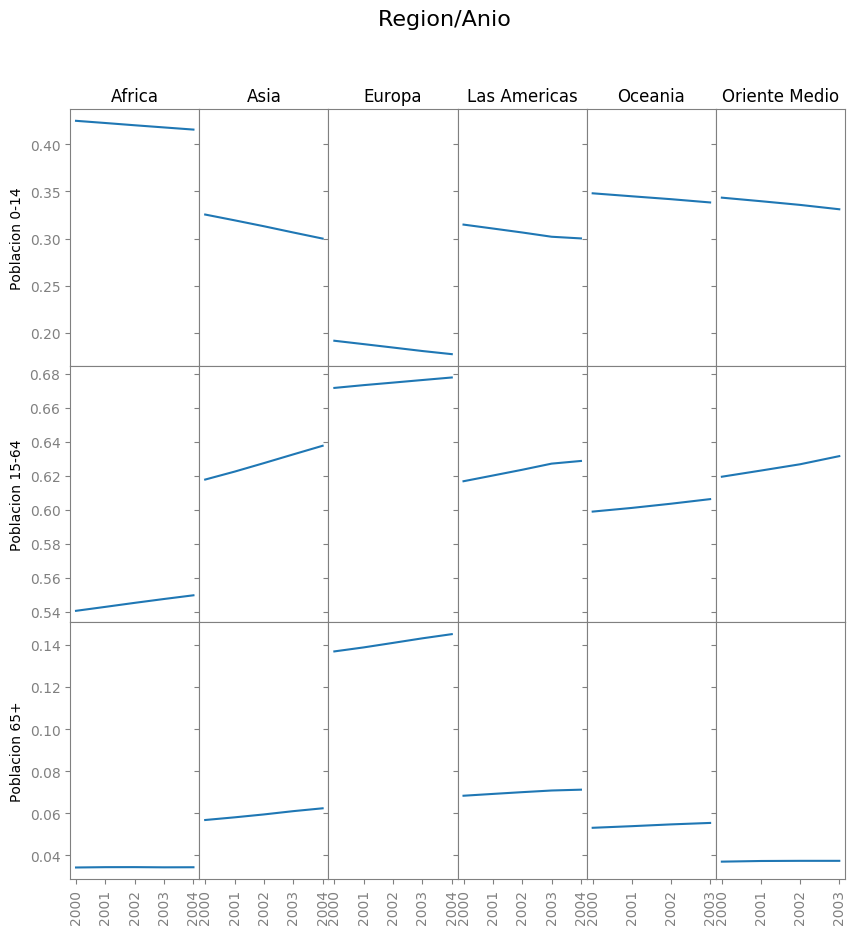

In [132]:

copia = df.copy()
year=[]
year = [ z.split('-')[0] for z in df.Ano]
df['year']=soloano
Anios= df.year.unique()
AUX=pd.DataFrame()
with plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'gray', 'ytick.color':'gray', 'figure.facecolor':'white'}): 
    fig1, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(10, 10))
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
#plt.style.use('default')
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Anios):
        y=(df[df['year'] == Anio].groupby('Region')[indname].mean()/100)
        AUX[Anio]=y
        y=[]
    AUX.index=df['Region'].unique()
    AUXT=AUX.T
    for i, colname in enumerate(AUXT.columns):
        axs[w,i].plot(AUXT[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)
fig1.suptitle('Region/Anio', fontsize=16)

---